In [596]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

pd.options.mode.chained_assignment = None 

## Step 1: Find and load the selected dataset for supervised learning
Loading ecommerce data from kaggle (https://www.kaggle.com/prachi13/customer-analytics)


In [519]:
folder = "https://raw.githubusercontent.com/beyenidogan/AdvData/main/Project1/"
file_name="ecommerce_shipping.csv"
file_url=folder+file_name

shipping = pd.read_csv(file_url,error_bad_lines=False)


In [520]:
shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN
0,1,D,Flight,4,2,177,3,low,F,44,1233.0,1
1,2,F,Flight,4,5,216,2,low,M,59,3088.0,1
2,3,A,Flight,2,2,183,4,low,M,48,3374.0,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177.0,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484.0,1


## Step 2: Exploring the dataset

In [521]:
shipping.shape

(10999, 12)

Exploring the data using the pandas functions info() and describe(). Note that the describe() function is only summarizing the numeric variables.
In order to understand the categorical variables value_counts() will be used. Note that the attributes Customer_Rating and ReachedonTime_YN are described as a number, but also will be included as categorical.

In [522]:
shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        9898 non-null   float64
 11  ReachedonTime_YN     10999 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.0+ MB


In [523]:
shipping.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,ReachedonTime_YN
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,9898.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3636.579612,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1636.169391,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1842.000000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4150.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5051.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [524]:
categorical_features=['Warehouse_block','Mode_of_Shipment', 'Gender','Product_importance', 'ReachedonTime_YN']
shipping[categorical_features] = shipping[categorical_features].astype(str)

shipping[categorical_features].apply(pd.Series.value_counts)

,Warehouse_block,Mode_of_Shipment,Gender,Product_importance,ReachedonTime_YN
0,NaN,NaN,NaN,NaN,4436.0
1,NaN,NaN,NaN,NaN,6563.0
A,1833.0,NaN,NaN,NaN,NaN
B,1833.0,NaN,NaN,NaN,NaN
C,1833.0,NaN,NaN,NaN,NaN
D,1834.0,NaN,NaN,NaN,NaN
F,3666.0,NaN,5545.0,NaN,NaN
Flight,NaN,1777.0,NaN,NaN,NaN
M,NaN,NaN,5454.0,NaN,NaN
Road,NaN,1760.0,NaN,NaN,NaN


Although the above table is rather difficult to read, since all the values from 5 different columns are sorted in alphabetical order, it is helpful to see all the distributions by number in one view. 
Note that the output variable (Customer_rating) values are almost equally distributed (~2000 each).

The target feature will be Customer_rating, so separating the other attributes as features:

In [525]:
X = shipping.drop("Customer_rating", axis=1)
print(X.head())

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0   1               D           Flight                    4   
1   2               F           Flight                    4   
2   3               A           Flight                    2   
3   4               B           Flight                    3   
4   5               C           Flight                    2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms ReachedonTime_YN  
0                44         1233.0                1  
1                59         3088.0                1  
2                48         3374.0          

In [526]:
y = shipping["Customer_rating"]
print(y.head())

0    2
1    5
2    2
3    3
4    2
Name: Customer_rating, dtype: int64


## Step 3: Divide into a training set and a testing set. 
Using scikitlearn to divide the data into training and testing sets, making sure that the testing and training sets are balanced in terms of target classes.

In [527]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Step 4: Explore the training set

Exploring the train dataset using info() and describe() pandas functions.


In [528]:
X_train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN
9537,9538,B,Ship,3,275,3,medium,M,7,4968.0,0
1832,1833,A,Ship,3,166,2,medium,F,58,1319.0,1
1687,1688,F,Ship,5,258,2,medium,F,48,3717.0,1
600,601,D,Ship,6,133,5,medium,M,32,1367.0,1
6740,6741,A,Ship,6,210,4,medium,M,9,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
4859,4860,F,Ship,5,231,2,low,M,8,5743.0,1
3264,3265,D,Road,4,216,2,low,M,2,4905.0,0
9845,9846,F,Road,4,161,3,medium,M,3,4590.0,0
10799,10800,F,Road,4,245,6,medium,M,2,1727.0,1


In [529]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8249 entries, 9537 to 2732
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8249 non-null   int64  
 1   Warehouse_block      8249 non-null   object 
 2   Mode_of_Shipment     8249 non-null   object 
 3   Customer_care_calls  8249 non-null   int64  
 4   Cost_of_the_Product  8249 non-null   int64  
 5   Prior_purchases      8249 non-null   int64  
 6   Product_importance   8249 non-null   object 
 7   Gender               8249 non-null   object 
 8   Discount_offered     8249 non-null   int64  
 9   Weight_in_gms        7431 non-null   float64
 10  ReachedonTime_YN     8249 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 773.3+ KB


In [530]:
X_train.describe()

,ID,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,8249.000000,8249.000000,8249.000000,8249.000000,8249.000000,7431.000000
mean,5480.974300,4.058795,209.908595,3.573767,13.606134,3633.454044
std,3179.856598,1.141243,47.850016,1.510124,16.414134,1641.273883
min,1.000000,2.000000,96.000000,2.000000,1.000000,1002.000000
25%,2720.000000,3.000000,170.000000,3.000000,4.000000,1839.500000
50%,5487.000000,4.000000,213.000000,3.000000,7.000000,4145.000000
75%,8225.000000,5.000000,250.000000,4.000000,10.000000,5065.000000
max,10998.000000,7.000000,310.000000,10.000000,65.000000,7846.000000


The distribution (looking at the mean and std variation) of the numeric variables above are fairly similar to the full dataset.

In [531]:
X_train[categorical_features].apply(pd.Series.value_counts)

,Warehouse_block,Mode_of_Shipment,Gender,Product_importance,ReachedonTime_YN
0,NaN,NaN,NaN,NaN,3301.0
1,NaN,NaN,NaN,NaN,4948.0
A,1365.0,NaN,NaN,NaN,NaN
B,1386.0,NaN,NaN,NaN,NaN
C,1338.0,NaN,NaN,NaN,NaN
D,1404.0,NaN,NaN,NaN,NaN
F,2756.0,NaN,4187.0,NaN,NaN
Flight,NaN,1326.0,NaN,NaN,NaN
M,NaN,NaN,4062.0,NaN,NaN
Road,NaN,1322.0,NaN,NaN,NaN


In [532]:
y_train.value_counts()

1    1697
3    1684
4    1668
2    1602
5    1598
Name: Customer_rating, dtype: int64

Comparing the counts of target variable (Customer_rating) of the train dataset to the original dataset, it can be said that the split is fairly balanced (all categories are around ~1600 values vs ~2000 in the original dataset).
It is also the case for the other categorical variables, which have proportinal representation in each category values.

## Step 4: Data cleaning
Address any missing values in the training set, creating a second, cleaned, version of your dataset. Then applying the same procedure to the test set.

The some options for handling the null values are:
“Get rid of the corresponding samples.”
“Get rid of the whole attribute (column).”
“Set the values to some value (zero, the mean, the median, etc.).”

Note that looking at the info of the full dataset, we already know that Weight_in_gms has less number of non-null values, thus might require more attention.

In [533]:
X_train.isnull().values.any()

True

In [534]:
X_test.isnull().values.any()

True

In [535]:
X_train['Warehouse_block'].isnull().values.any()

False

In [536]:
X_train['Mode_of_Shipment'].isnull().values.any()

False

In [537]:
X_train['Customer_care_calls'].isnull().values.any()

False

In [538]:
X_train['Cost_of_the_Product'].isnull().values.any()

False

In [539]:
X_train['Prior_purchases'].isnull().values.any()

False

In [540]:
X_train['Product_importance'].isnull().values.any()

False

In [541]:
X_train['Gender'].isnull().values.any()

False

In [542]:
X_train['Discount_offered'].isnull().values.any()

False

In [543]:
X_train['Weight_in_gms'].isnull().values.any()

True

In [544]:
X_train['ReachedonTime_YN'].isnull().values.any()

False

In [545]:
X_test['Warehouse_block'].isnull().values.any()

False

In [546]:
X_test['Mode_of_Shipment'].isnull().values.any()

False

In [547]:
X_test['Customer_care_calls'].isnull().values.any()

False

In [548]:
X_test['Cost_of_the_Product'].isnull().values.any()

False

In [549]:
X_test['Prior_purchases'].isnull().values.any()

False

In [550]:
X_test['Product_importance'].isnull().values.any()

False

In [551]:
X_test['Gender'].isnull().values.any()

False

In [552]:
X_test['Discount_offered'].isnull().values.any()

False

In [553]:
X_train['Weight_in_gms'].isnull().values.any()

True

In [554]:
X_train['ReachedonTime_YN'].isnull().values.any()

False

In [555]:
X_test['Warehouse_block'].isnull().values.any()

False

In [556]:
#checking how many elements are null
X_train['Weight_in_gms'].isnull().values.sum()

818

In [557]:
X_train2=X_train

In [558]:
#dropping the NA rows
X_train2.dropna(subset=['Weight_in_gms'])

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN
9537,9538,B,Ship,3,275,3,medium,M,7,4968.0,0
1832,1833,A,Ship,3,166,2,medium,F,58,1319.0,1
1687,1688,F,Ship,5,258,2,medium,F,48,3717.0,1
600,601,D,Ship,6,133,5,medium,M,32,1367.0,1
8123,8124,F,Ship,3,152,4,medium,M,2,4809.0,0
...,...,...,...,...,...,...,...,...,...,...,...
4859,4860,F,Ship,5,231,2,low,M,8,5743.0,1
3264,3265,D,Road,4,216,2,low,M,2,4905.0,0
9845,9846,F,Road,4,161,3,medium,M,3,4590.0,0
10799,10800,F,Road,4,245,6,medium,M,2,1727.0,1


In [559]:
X_test2=X_test
#dropping the NA rows
X_test2.dropna(subset=['Weight_in_gms'])

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN
7262,7263,A,Flight,5,240,2,medium,M,4,4447.0,1
4795,4796,F,Flight,6,247,4,low,F,2,1326.0,0
1121,1122,F,Ship,2,264,3,medium,M,10,3409.0,1
1328,1329,A,Ship,5,201,3,medium,F,65,2488.0,1
8098,8099,C,Flight,2,242,3,high,M,9,4717.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1768,1769,C,Road,4,147,2,high,F,52,1570.0,1
6156,6157,D,Road,3,273,4,medium,M,4,5361.0,0
4567,4568,F,Ship,4,262,4,low,M,2,5311.0,0
3775,3776,F,Ship,4,283,7,high,F,9,5252.0,1


## Step 5: Visualizing the training set. 

Using the following pandas functions to visualize the data:

DataFrame.hist

plotting.scatter_matrix()

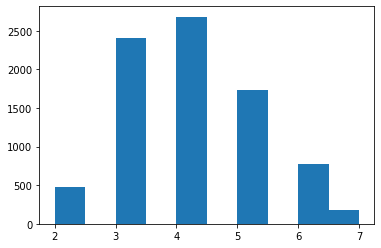

In [560]:
import matplotlib.pyplot as plt
plt.hist(X_train2['Customer_care_calls'].values)
plt.show()

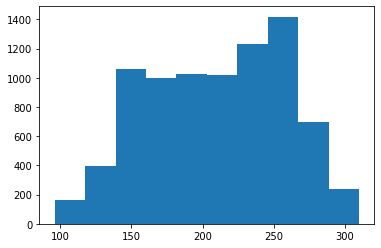

In [561]:
plt.hist(X_train2['Cost_of_the_Product'].values, bins=10)
plt.show()

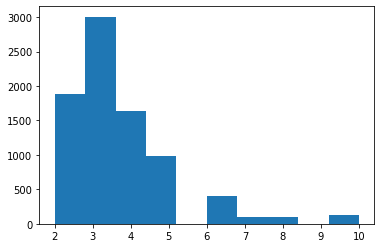

In [567]:
plt.hist(X_train2['Prior_purchases'].values)
plt.show()

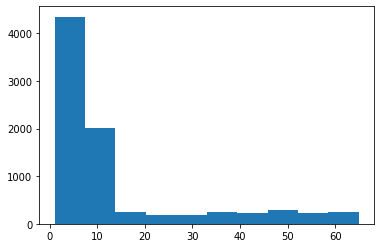

In [568]:
plt.hist(X_train2['Discount_offered'].values,bins=10)
plt.show()

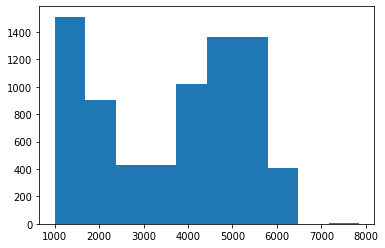

In [569]:
plt.hist(X_train2['Weight_in_gms'].values, bins=10)
plt.show()

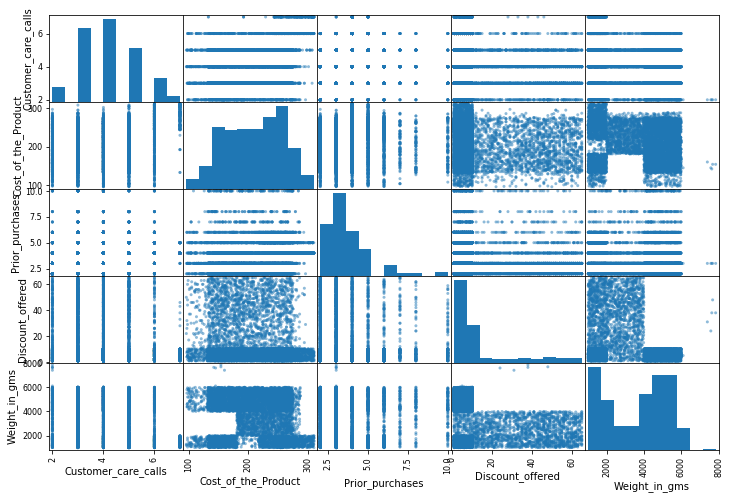

In [602]:
from pandas.plotting import scatter_matrix
attributes = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases','Discount_offered','Weight_in_gms']
scatter_matrix(X_train2[attributes], figsize=(12, 8))
plt.show()

## Step 6: Applying transformations to the datasets
Applying transformations to the features in the dataset and then plotting the histograms and scatter matrices of the resultant data.

In [577]:
#applying scaler for all attributes
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [578]:
print(X_train2.var())

ID                     1.011149e+07
Customer_care_calls    1.302435e+00
Cost_of_the_Product    2.289624e+03
Prior_purchases        2.280476e+00
Discount_offered       2.694238e+02
Weight_in_gms          2.693780e+06
dtype: float64


In [579]:
X_train2_subset= X_train2[['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases','Discount_offered','Weight_in_gms']]

In [589]:
X_train2scaled=pd.DataFrame(scaler.fit_transform(X_train2_subset))
X_train2scaled.columns=X_train2_subset.columns
print(X_train2scaled.var())

Customer_care_calls    1.000121
Cost_of_the_Product    1.000121
Prior_purchases        1.000121
Discount_offered       1.000121
Weight_in_gms          1.000135
dtype: float64


In [583]:
#repeating the same procedure on the test dataset
print(X_test2.var())


ID                     9.994515e+06
Customer_care_calls    1.304938e+00
Cost_of_the_Product    2.371291e+03
Prior_purchases        2.435385e+00
Discount_offered       2.416470e+02
Weight_in_gms          2.627612e+06
dtype: float64


In [584]:
X_test2_subset= X_test2[['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases','Discount_offered','Weight_in_gms']]

In [590]:
X_test2scaled=pd.DataFrame(scaler.fit_transform(X_test2_subset))
X_test2scaled.columns=X_test2_subset.columns
print(X_test2scaled.var())

Customer_care_calls    1.000364
Cost_of_the_Product    1.000364
Prior_purchases        1.000364
Discount_offered       1.000364
Weight_in_gms          1.000406
dtype: float64


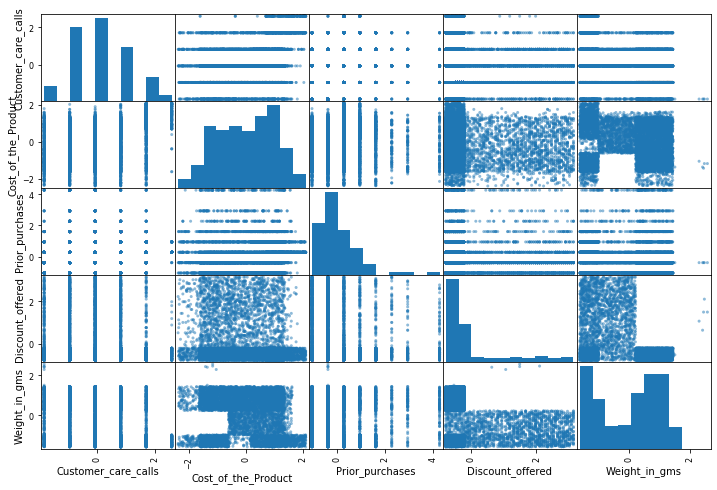

In [599]:
#visualizing the train dataset for the scaled attributes
scatter_matrix(X_train2scaled[attributes], figsize=(12, 8))
plt.show()

Since the scaling was linear, the graphs are essentially the same.

In [597]:
X_train2["Cost_of_the_Product_log"]=np.log(X_train2["Cost_of_the_Product"])
print(X_train2.var())

ID                         1.011149e+07
Customer_care_calls        1.302435e+00
Cost_of_the_Product        2.289624e+03
Prior_purchases            2.280476e+00
Discount_offered           2.694238e+02
Weight_in_gms              2.693780e+06
Cost_of_the_Product_log    5.911979e-02
dtype: float64


In [598]:
X_train2["Weight_in_gms_log"]=np.log(X_train2["Weight_in_gms"])
print(X_train2.var())

ID                         1.011149e+07
Customer_care_calls        1.302435e+00
Cost_of_the_Product        2.289624e+03
Prior_purchases            2.280476e+00
Discount_offered           2.694238e+02
Weight_in_gms              2.693780e+06
Cost_of_the_Product_log    5.911979e-02
Weight_in_gms_log          3.119970e-01
dtype: float64


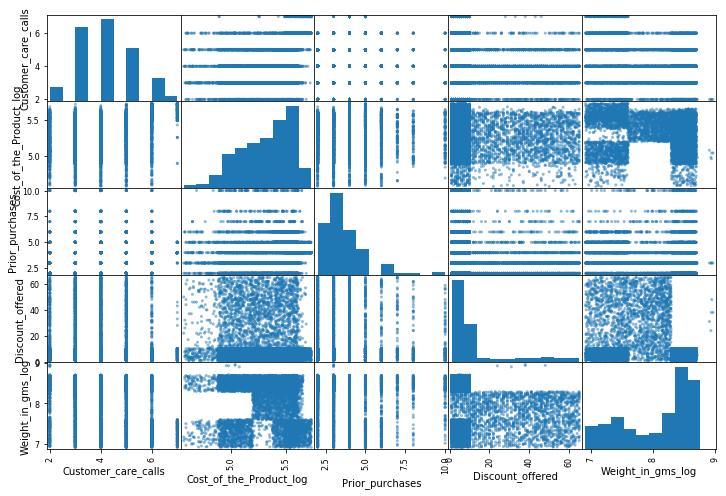

In [604]:
attributes2 = ['Customer_care_calls', 'Cost_of_the_Product_log', 'Prior_purchases','Discount_offered','Weight_in_gms_log']
scatter_matrix(X_train2[attributes2], figsize=(12, 8))
plt.show()

We tried both scaling (on all numeric attributes) and log transformation on two of the most variable attributes), but none of them revealed any meaningful relationship among the X attributes.
But note that we actually separated the outcome variable early on (due to the given sequence of the assignment). There could be possible relationships between the explanatory variables and the outcome variables.